In [2]:
import pandas as pd
df = pd.read_excel("~/Desktop/Research/LMU_Wellness/data/Wellness_Database_May19.xlsx", sheet_name="Wellness Responses")

In [3]:
sore_areas = ["Neck", "Back", "Shoulders", "Chest", "Arms", "Hip Flexors", "Glutes", "Hamstrings", "Quadricps", "Adductors", "Calves", "Feet"]
for area in sore_areas:
    df[area] = df["Select where you are sore:"].str.contains(area, na=False).astype(int)

# Drop the original "Select where you are sore:" column
df = df.drop("Select where you are sore:", axis=1)

In [4]:
columns_to_drop = ['Timestamp', 'Athlete ID #', 'Data ID', 'Week ID', 'Week ID Refined', 'Date Value', 'Year ID', 'Season ID', 'Injury Refined', 'Position', 'Classification', 'Stress RA', 'Stress StdDev', 'Stress Z-Score', 'Stress Wellness Score', 'Sleep Quality RA', 'Sleep Quality StdDev', 'Sleep Quality Z-Score', 'Sleep Quality Wellness Score', 'Sleep Quantity RA', 'Sleep Quantity StdDev', 'Sleep Quantity Z-Score', 'Sleep Quantity Wellness Score', 'Soreness RA', 'Soreness StdDev', 'Soreness Z-Score', 'Soreness Wellness Score', 'Hydrate RA', 'Hydrate StdDev', 'Hydrate Z-Score', 'Hydrate Wellness Score', 'Fuel RA', 'Fuel StdDev', 'Fuel Z-Score', 'Fuel Wellness Score', 'Readiness Score']
df = df.drop(columns_to_drop, axis=1)

In [5]:
df['No Injury'] = ((df['What is your injury status?'] == 'Full = I have no injury').astype(int))*10
df['Some Injury'] = ((df['What is your injury status?'] == 'Limited = I need a modification during lift / practice').astype(int))*10
df['Injury'] = ((df['What is your injury status?'] == 'Out = I have an injury').astype(int))*10

# Drop the original column
df = df.drop('What is your injury status?', axis=1)

In [6]:
df1 = df.copy()
df2 = df.copy()

In [7]:
df1 = df1[df1["How well did you hydrate?"].isnull()]
df2 = df2.dropna(subset=["How well did you hydrate?"])

In [8]:
df1

,Athlete Name,How stressed are you?,How well did you sleep?,How many hours did you sleep?,How sore are you?,How well did you hydrate?,How well did you fuel?,What is your readiness score?,Neck,Back,...,Hip Flexors,Glutes,Hamstrings,Quadricps,Adductors,Calves,Feet,No Injury,Some Injury,Injury
0,Sarah Murphy,6,6,8.0,7,NaN,NaN,NaN,0,0,...,0,0,1,1,0,0,0,10,0,0
1,Genevieve Watkins,6,6,6.0,3,NaN,NaN,NaN,1,0,...,0,0,1,1,0,1,0,10,0,0
2,Sydney Douglas,9,5,8.0,3,NaN,NaN,NaN,0,1,...,1,1,1,1,0,1,1,10,0,0
3,Gabriella Marchal,5,7,8.0,3,NaN,NaN,NaN,0,0,...,1,0,0,1,0,1,1,10,0,0
4,Sarah Murphy,7,8,8.0,6,NaN,NaN,NaN,0,0,...,0,0,1,1,0,0,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,Jennessa Groves,9,9,9.0,8,NaN,NaN,NaN,0,0,...,0,1,0,0,0,0,1,0,10,0
1057,Abby Lynch,6,6,7.0,7,NaN,NaN,NaN,0,1,...,0,1,1,0,1,1,1,0,10,0
1058,Madison Werner,9,8,6.0,9,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,10,0,0
1059,Madison Thomas,10,8,9.0,9,NaN,NaN,NaN,0,0,...,0,1,0,0,0,0,0,10,0,0


In [9]:
df2

,Athlete Name,How stressed are you?,How well did you sleep?,How many hours did you sleep?,How sore are you?,How well did you hydrate?,How well did you fuel?,What is your readiness score?,Neck,Back,...,Hip Flexors,Glutes,Hamstrings,Quadricps,Adductors,Calves,Feet,No Injury,Some Injury,Injury
1061,Makiya Christensen,7,7,9.0,6,6.0,6.0,65.0,1,1,...,1,0,1,0,1,0,0,0,10,0
1062,Ellie Sommers,9,9,8.0,9,9.0,8.0,90.0,0,0,...,1,1,1,1,0,0,0,10,0,0
1063,Sophia Pearlmann,9,8,8.0,6,6.0,9.0,8.0,0,0,...,1,1,1,1,0,0,0,10,0,0
1064,Alice Santen,6,9,9.0,5,7.0,7.0,75.0,0,0,...,0,0,1,1,0,0,0,10,0,0
1065,Kailey Park,9,9,9.0,5,7.0,8.0,86.0,0,0,...,1,0,1,0,0,0,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,Bella Beltran,10,10,8.0,4,10.0,10.0,75.0,0,0,...,1,0,1,1,0,0,0,10,0,0
1544,Gabriella Marchal,10,10,8.0,8,10.0,10.0,90.0,0,0,...,0,0,1,0,0,1,0,10,0,0
1545,Makiya Christensen,6,8,9.0,5,8.0,7.0,81.0,0,1,...,1,0,1,1,0,0,1,10,0,0
1546,Megan Tinsley,9,2,5.0,8,8.0,4.0,50.0,0,0,...,0,0,0,0,0,0,0,10,0,0


In [10]:
### DATA ANALYSIS

In [11]:
import matplotlib.pyplot as plt

In [12]:
name_counts = df["Athlete Name"].value_counts().to_dict()
print(len(name_counts))
print(name_counts)

33
{'Kailey Park': 155, 'Makiya Christensen': 140, 'Megan Tinsley': 131, 'Alice Santen': 123, 'Bella Beltran': 74, 'Genevieve Watkins': 66, 'Gabriella Marchal': 62, 'Amanda Delgado': 54, 'Kelsey Wong': 54, 'Ellen Loncar': 50, 'Sophia Pearlmann': 49, 'Jessie Halladay': 46, 'Ellie Sommers': 44, 'Abby Stewart': 42, 'Makayla Demelo': 35, 'Jennessa Groves': 34, 'Megan Rucker': 33, 'Amber McCorkle': 33, 'Madison Werner': 30, 'Sydney Saypack': 30, 'Amanda Perez': 28, 'Madison Smith': 27, 'Abby Lynch': 27, 'Jennie Immethun': 27, 'Lilly Horne': 25, 'Sydney Douglas': 24, 'Sarah Murphy': 24, 'Madison Thomas': 24, 'Sierra Dunphy': 18, 'McKenna Lutzker': 18, 'Sadie Kenny': 12, 'Karla Sandoval': 7, 'Sarai Zedingil': 2}


In [13]:
name_counts = df2["Athlete Name"].value_counts().to_dict()
print(len(name_counts))
print(name_counts)

17
{'Kailey Park': 47, 'Makiya Christensen': 46, 'Megan Tinsley': 43, 'Alice Santen': 41, 'Gabriella Marchal': 35, 'Ellie Sommers': 32, 'Bella Beltran': 31, 'Ellen Loncar': 26, 'Genevieve Watkins': 26, 'Amber McCorkle': 26, 'Sophia Pearlmann': 25, 'Kelsey Wong': 24, 'Megan Rucker': 22, 'Madison Werner': 21, 'Jennessa Groves': 21, 'Madison Thomas': 12, 'Abby Lynch': 9}


In [14]:
stats1 = df1.describe()
stats1

,How stressed are you?,How well did you sleep?,How many hours did you sleep?,How sore are you?,How well did you hydrate?,How well did you fuel?,What is your readiness score?,Neck,Back,Shoulders,...,Hip Flexors,Glutes,Hamstrings,Quadricps,Adductors,Calves,Feet,No Injury,Some Injury,Injury
count,1061.000000,1061.000000,1061.000000,1061.000000,0.0,0.0,0.0,1061.000000,1061.000000,1061.000000,...,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000
mean,7.386428,7.426013,7.849482,6.431668,NaN,NaN,NaN,0.143261,0.249764,0.066918,...,0.310085,0.211122,0.485391,0.436381,0.114043,0.364750,0.299717,8.265787,1.376060,0.358153
std,1.956982,1.665250,1.219825,1.897440,NaN,NaN,NaN,0.350504,0.433081,0.249998,...,0.462746,0.408297,0.500022,0.496170,0.318014,0.481587,0.458350,3.787896,3.446485,1.859170
min,1.000000,2.000000,2.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,7.000000,7.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
50%,8.000000,8.000000,8.000000,7.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
75%,9.000000,9.000000,9.000000,8.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000
max,10.000000,10.000000,12.000000,10.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000


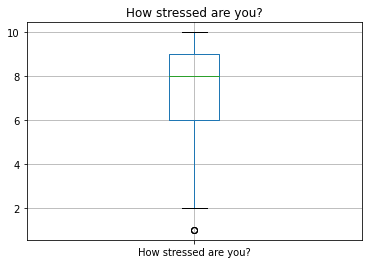

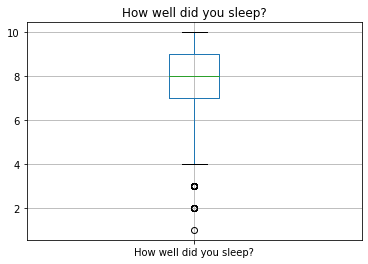

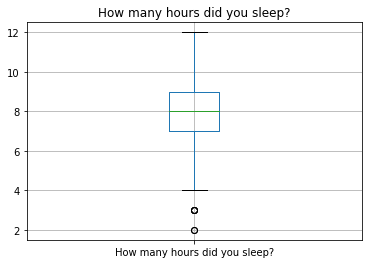

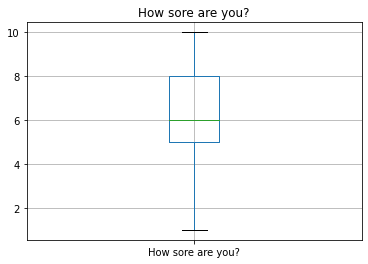

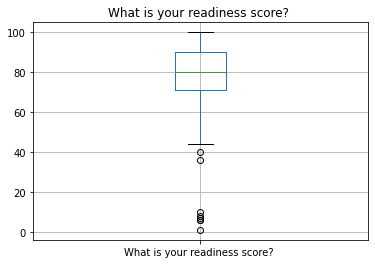

In [15]:
skip = ["Athlete Name", "How well did you hydrate?", "How well did you fuel?", "What is your readiness score?", "Neck", "Back", "Shoulders", "Chest", "Arms", "Hip Flexors", "Glutes", "Hamstrings", "Quadricps", "Adductors", "Calves", "Feet", "No Injury", "Some Injury", "Injury"]

for column in df1.columns:
    if column in skip:
        continue
    plt.figure()
    df.boxplot(column=column)
    plt.title(column)
    plt.show()

In [16]:
stats2 = df2.describe()
stats2

,How stressed are you?,How well did you sleep?,How many hours did you sleep?,How sore are you?,How well did you hydrate?,How well did you fuel?,What is your readiness score?,Neck,Back,Shoulders,...,Hip Flexors,Glutes,Hamstrings,Quadricps,Adductors,Calves,Feet,No Injury,Some Injury,Injury
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,...,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,7.472279,7.457906,7.616016,6.367556,7.581109,8.006160,79.217659,0.080082,0.303901,0.182752,...,0.427105,0.383984,0.603696,0.422998,0.114990,0.242300,0.190965,8.829569,1.006160,0.164271
std,2.056494,1.657311,1.248205,1.828674,1.700004,1.574607,14.660698,0.271699,0.460414,0.386860,...,0.495166,0.486854,0.489632,0.494543,0.319338,0.428915,0.393466,3.218022,3.011289,1.272419
min,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,7.000000,7.000000,5.000000,7.000000,7.000000,71.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
50%,8.000000,8.000000,8.000000,6.000000,8.000000,8.000000,80.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
75%,9.000000,8.000000,8.000000,8.000000,9.000000,9.000000,90.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000


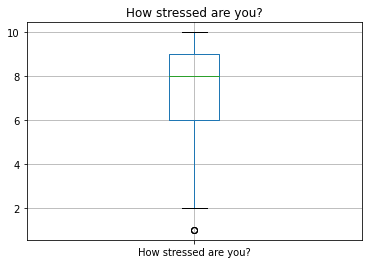

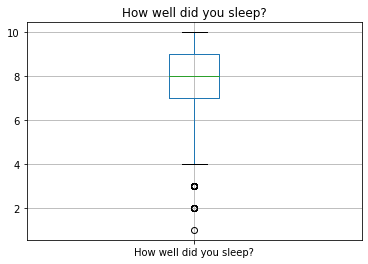

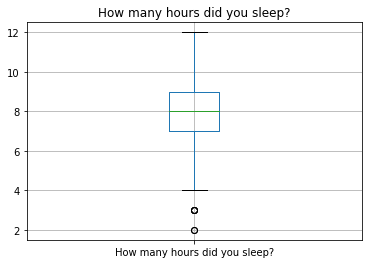

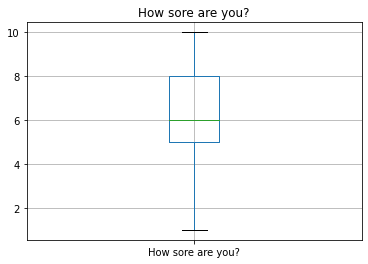

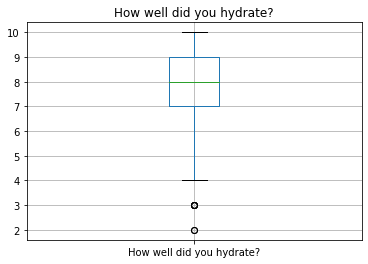

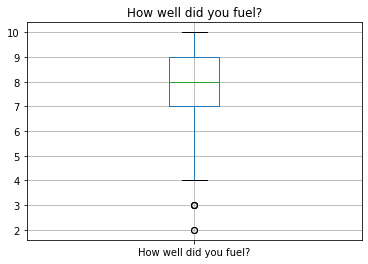

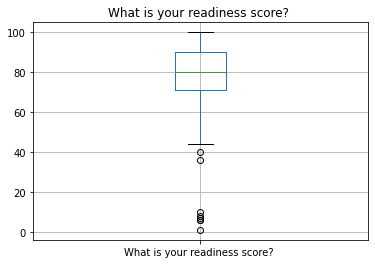

In [16]:
skip = ["Athlete Name", "Neck", "Back", "Shoulders", "Chest", "Arms", "Hip Flexors", "Glutes", "Hamstrings", "Quadricps", "Adductors", "Calves", "Feet", "No Injury", "Some Injury", "Injury"]


for column in df2.columns:
    if column in skip:
        continue
    plt.figure()
    df.boxplot(column=column)
    plt.title(column)
    plt.show()